# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

##  Haberman's Survival Data Set : Survival of patients who had undergone surgery for breast cancer
###Description :
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**1.** Title: Haberman's Survival Data

**2.** Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

**3.** Past Usage:

    a. Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
    b. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the  American Statistical Association 79: 61-83.
    c. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.

**4.** Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**5.** Number of Instances: 306

**6.** Number of Attributes: 4 (including the class attribute)

**7.** Attribute Information:

    a. Age of patient at time of operation (numerical)
    b. Patient's year of operation (year - 1900, numerical)
    c. Number of positive axillary nodes detected (numerical)
    d. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
**8.** Missing Attribute Values: None


###Objective : Predict the Survival of Patient for 5 Years or longer or Patient died within 5 Years.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My\ Drive/Study/Applied AI/Assignments/Mandatory Assignments/1. EDA

/content/drive/My Drive/Study/Applied AI/Assignments/Mandatory Assignments/1. EDA


In [ ]:
#Importing the necessary tools for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
haberman = pd.read_csv('haberman.csv') #Reading the Haberman Dataset

In [ ]:
haberman.info() #Finding the General Information about dataset, like Number of columns, entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


**From above info cell , we know there are 4 columns and 306 Enteries with column names, age, year, nodes, status.
All the columns are of Integer Type and there is no NaN Value in any column.**


In [ ]:
haberman.head(10)   #Just Showing the first 10 rows to get the Idea about data points

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [ ]:
haberman.describe()   #describe Gives lot of information

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**From describe method we get lot of insights of data set.**


*   **Minimum and Maximum Age, Nodes and Year**
*   **Percentiles information, like 50 % of the people were of age less than equal to 52**
*   **75% People were having nodes less than equal to 4 while maximum node is 52 means only few people will be having that much higher nodes.**





In [ ]:
haberman['status'].value_counts() #It will count the unique category

1    225
2     81
Name: status, dtype: int64

We have two different category 1 and 2, 1's count is 225 and 2's count is 81 which shows our dataset in not balanced.


*   **1 = Survived for 5 or more years**
*   **2 = Not Survived for 5 or more years**



In [ ]:
"""
    Let's change the 1 to Survived and 2 to Not Survived to make the data set more readable.
    I used the apply method which is used to apply any function to each data point of any column.
    and then lambda function to achieve our task.
"""

haberman["status"] = haberman["status"].apply(lambda x : 'Survived' if x == 1 else "Not Survived")

#haberman["status"] = haberman["status"].map({1:"Survived", 2:"Not Survived"})   #Another Method 

In [ ]:
haberman["status"].head(10)   ## Showing the head of status column of haberman to check if 1 and 2 are converted into Survived and Not Survived

0        Survived
1        Survived
2        Survived
3        Survived
4        Survived
5        Survived
6        Survived
7    Not Survived
8    Not Survived
9        Survived
Name: status, dtype: object

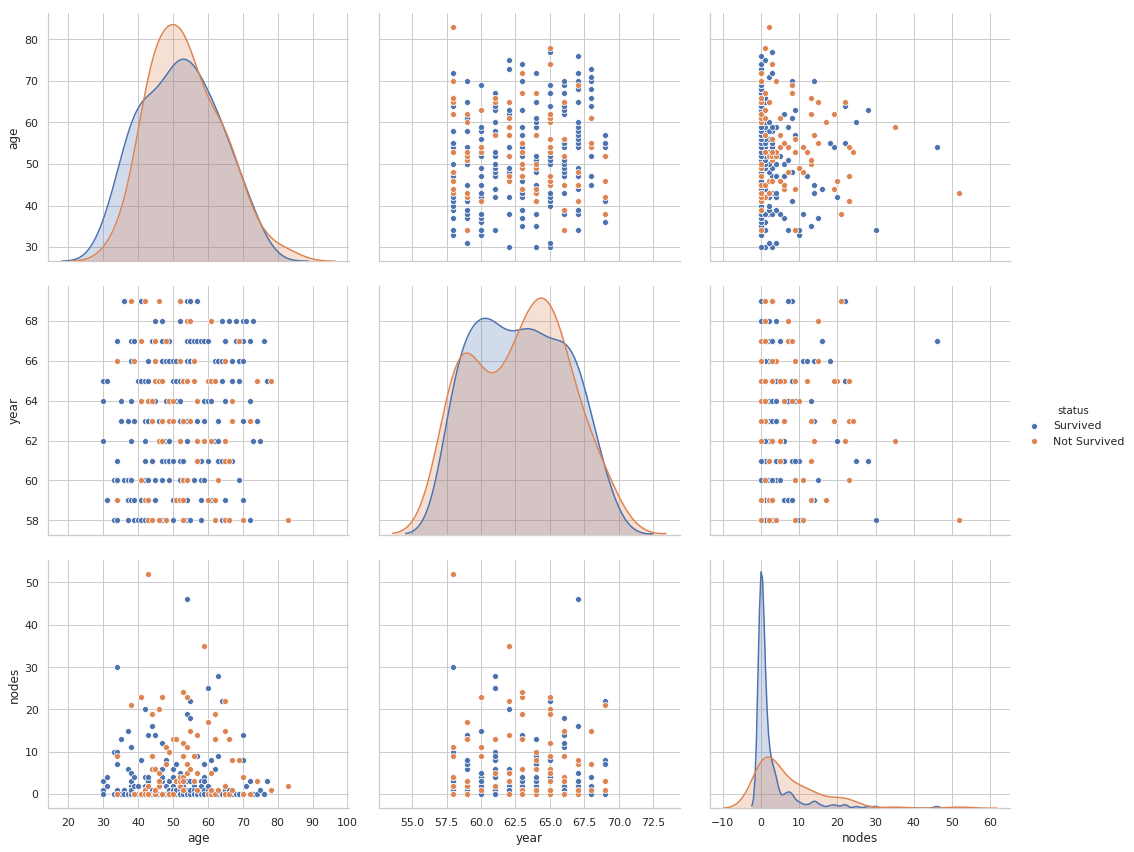

In [ ]:
"""
    Here setting the plot style to whitegrid and showing the 2d scatter plots of all features with each other.
"""
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", height = 4, aspect = 1.2)

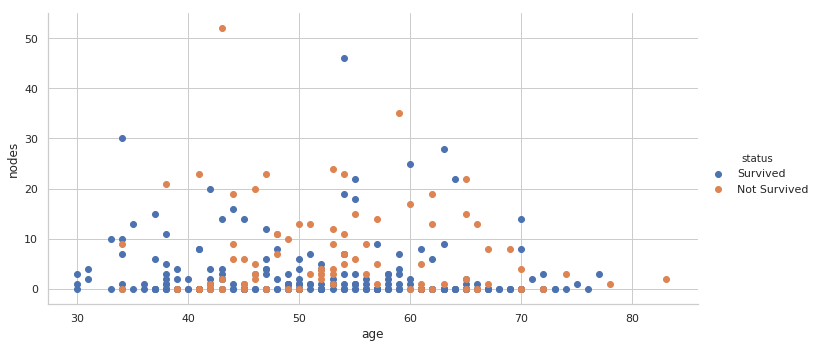

In [ ]:
"""
        here showing the 2d scatter plot between age and nodes to get insights.
"""

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status",height = 5, aspect = 2).map(plt.scatter, "age", "nodes").add_legend()
#plt.show()

**Above Scatter Plot tell us Most of the people were having nodes 0 and 1.**

**People who are having axil nodes 0 and 1 are more likely to survive irrespective of their age.**

**Patients their age is more than 50 and nodes are more than 8 are more likely  not to survive.**

3

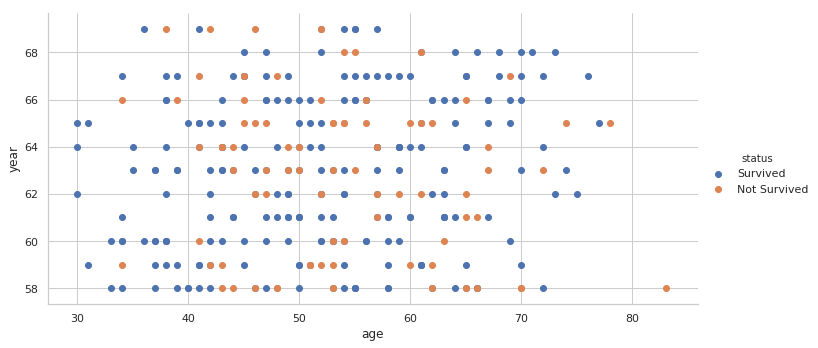

In [ ]:
"""
        here showing the 2d scatter plot between age and year to get insights.
"""


sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status",height = 5, aspect = 2).map(plt.scatter, "age", "year").add_legend()
#plt.show()

**Above 2d-Scatter plot tell us, most of the people were age of around between 40 and 65 and In Year 1960 and 1961Most of the people were survived** 



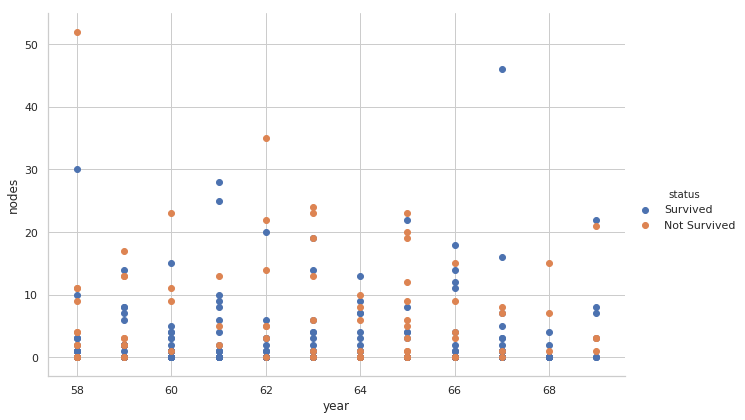

In [ ]:
"""
        here showing the 2d scatter plot between year and nodes to get insights.
"""

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status",height = 6, aspect = 1.5).map(plt.scatter, "year", "nodes").add_legend()
#plt.show()

**Above plot don't tell us much but, only few people were having nodes around 50 or higher and majority of operations were done between year 1960 and 1966** 
**Most of the People in 1965 and 1963 were not survived**

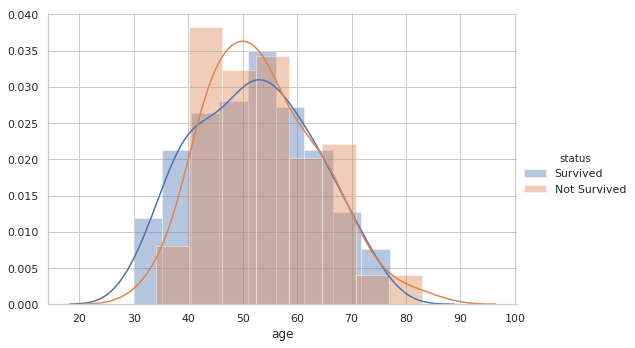

In [ ]:
"""
        here showing the Histogram of age with KDE to get the insights.
"""


sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height = 5, aspect = 1.5).map(sns.distplot, "age").add_legend()
#plt.show()

**Insights:**


*   **Patients with age less than 40 are more likely to survive.**
*   **Patients with age between 40 and 50 are more likely to die.**
*   **Patients with age more than 75 are more likely to die.**



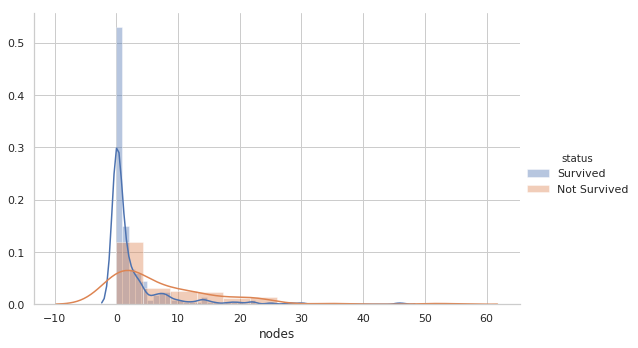

In [ ]:
"""
        here showing the Histogram of nodes with KDE to get the insights.
"""

#plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height = 5, aspect = 1.5).map(sns.distplot, "nodes").add_legend()
#plt.show()

**Patients who are having nodes 0 are having high chances to survive.**

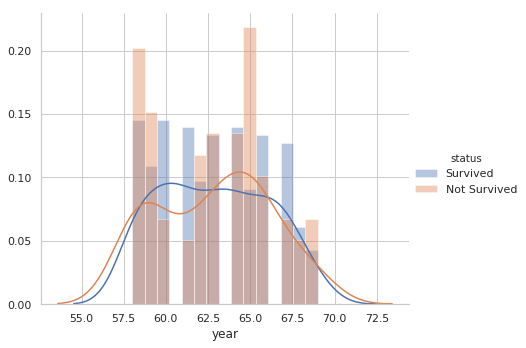

In [ ]:
"""
        here showing the Histogram of year with KDE to get the insights.
"""

#plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height = 5, aspect = 1.2).map(sns.distplot, "year", bins = 15,).add_legend()
#plt.show()

**Insights:**

*   **In 1958, 1959 and 1965 more people died.**
*   **In 1960 and 1961 more people survived.**

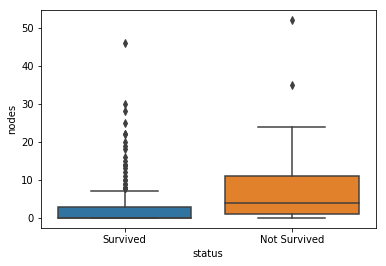

In [ ]:
#From the above EDA we came to know that, nodes are mor affecting the survival of the patients, so let's continue with nodes and draw box plot
sns.boxplot( x = "status", y = "nodes", data = haberman)

**Box Plot shows that Patients having less nodes are more likely to survive.
Patients who has more nodes are more likely to die.**

**Patients who has nodes 1 to 23 or 24 are more likely to die.**

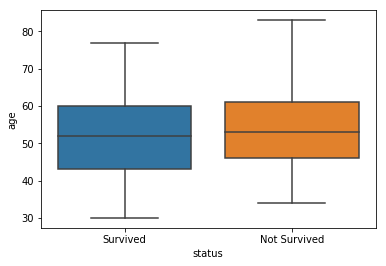

In [ ]:
sns.boxplot( x = "status", y = "age", data = haberman) #Box plot of status and age

**This Box Plot does not give much information, except patients with age less then 35 are having extreme chance of survival.**

Text(0.5, 24.0, 'Nodes')

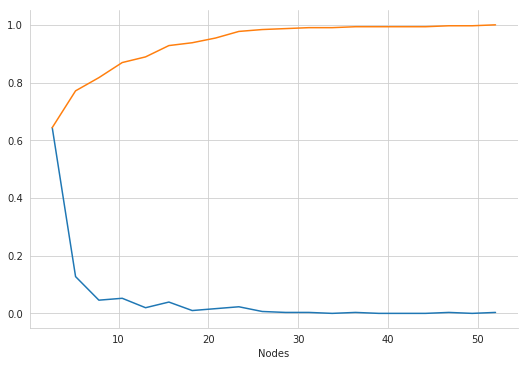

In [ ]:
"""
    Showing the  PDF and CDF in same plot.
"""

counts, bin_edges = np.histogram(haberman["nodes"], bins=20, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

sns.set_style("whitegrid")
sns.FacetGrid(height = 5,aspect = 1.5, data = haberman) 
plt.plot(bin_edges[1:], pdf)    #Plotting the PDF
plt.plot(bin_edges[1:], cdf)    #Plotting the CDF 

plt.xlabel("Nodes")
#plt.show()

PDF shows us that we have more lesser value nodes.

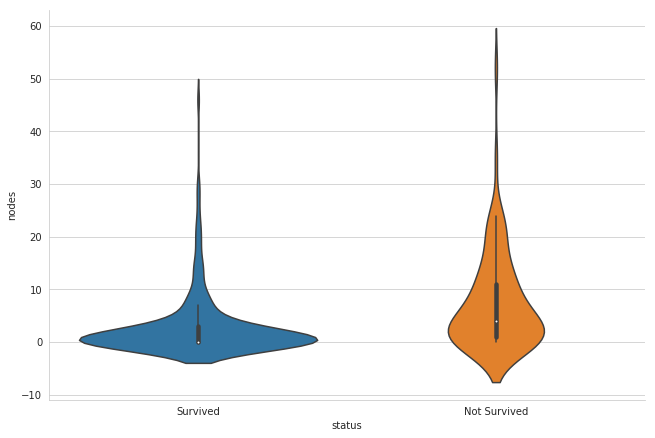

In [ ]:
"""
    Showing the violing plots of nodes and status column to get insights.
"""

sns.set_style("whitegrid")
sns.FacetGrid(height = 6, aspect = 1.5, data = haberman)
sns.violinplot(x="status", y="nodes", data= haberman)
plt.show()

**Above Violin plot shows us, Patients who has 0 nodes have extreme chance of survival and more nodes patients have more chances that patient will not survive.**

## **Final Conclusion:**


*   **People who are having axil nodes 0  are more likely to survive irrespective of their age.**

*   **Patients their age is more than 50 and nodes are more than 8 are more likely not to survive.**
*   **Most of the people were age of around between 40 and 65 and In Year 1960 and 1961Most of the people were survived.**

*   **Only few people were having nodes around 28 or higher and majority of operations were done between year 1960 and 1966 Most of the People in 1965 and 1963 were not survived.**

*   **Patients with age less than 40 are more likely to survive.**

*   **Patients with age between 40 and 50 are more likely to die.**

*   **Patients with age more than 75 are more likely to die.**

*   **Patients who are having nodes 0 are having high chances to survive.**

*   **Box Plot shows that Patients having less nodes are more likely to survive. Patients who has more nodes are more likely to die.**

*   **Patients who has nodes 1 to 23 or 24 are more likely to die.**

*   **Box Plot of age and status shows us Patients with age less then 35 are having extreme chance of survival.**

*   **Violin plot shows us, Patients who has 0 nodes have extreme chance of survival and more nodes patients have more chances that patient will not survive.**

## Objective: 

**From above Points we can say that axil nodes are very important feature to classify and then age is also important but not more than  axil nodes (Because there were patients having 0 nodes and were survived irrespective of their age and also there were patients who were less than 35 of age and survived)**


